In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
seg = pd.read_csv('segment-2.csv')
seg['month'] = seg['Date'].apply(lambda x: x[0:2] + '-18')
seg['sqrt-tpc'] = np.sqrt(seg['Total paid customers'])

In [3]:
X = seg[['Total paid customers', 'sqrt-tpc']]
y = seg['Segment 2 MRR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15081947)

In [4]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

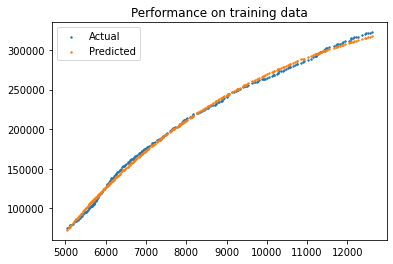

In [5]:
y_trn_pred = lr.predict(X_train)
plt.scatter(X_train['Total paid customers'], y_train, s = 2, label = 'Actual')
plt.scatter(X_train['Total paid customers'], y_trn_pred, s = 2, label = 'Predicted')
plt.legend()
ignore = plt.title('Performance on training data')

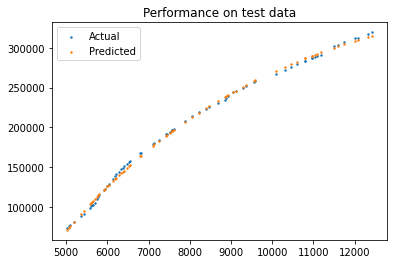

In [6]:
y_tst_pred = lr.predict(X_test)
plt.scatter(X_test['Total paid customers'], y_test, s = 2, label = 'Actual')
plt.scatter(X_test['Total paid customers'], y_tst_pred, s = 2, label = 'Predicted')
plt.legend()
ignore = plt.title('Performance on test data')

We will now predict 'Total paid customers' for the next three months.

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

a1 = ARIMA(X['Total paid customers'], order = (12, 0, 0))
f1 = a1.fit(method = 'mle', maxiter = 1000)
f1.summary()

/home/ajoshi/.local/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ajoshi/.local/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                               
================================================================================
Dep. Variable:     Total paid customers   No. Observations:                  365
Model:                      ARMA(12, 0)   Log Likelihood               -1480.049
Method:                             mle   S.D. of innovations             13.656
Date:                  Mon, 23 Nov 2020   AIC                           2988.097
Time:                          18:02:33   BIC                           3042.696
Sample:                               0   HQIC                          3009.795
                                                                                
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        8048.2562   4176.715      1.927      0.054    -137.956    1.62e+04
ar.L1.Total paid customers      1.0651      0.005    196.699      0.000       1.054       1.076
ar.L2.Total paid customers     -0.0172      0.058     -0.294      0.769      -0.132       0.097
ar.L3.Total paid customers      0.0162      0.077      0.209      0.834      -0.136       0.168
ar.L4.Total paid customers     -0.0463        nan        nan        nan         nan         nan
ar.L5.Total paid customers      0.0223        nan        nan        nan         nan         nan
ar.L6.Total paid customers     -0.0777      0.031     -2.505      0.012      -0.138      -0.017
ar.L7.Total paid customers      0.3886      0.031     12.620      0.000       0.328       0.449
ar.L8.Total paid customers     -0.3804      0.038     -9.926      0.000      -0.456      -0.305
ar.L9.Total paid customers      0.2225      0.021     10.521      0.000       0.181       0.264
ar.L10.Total paid customers    -0.0757      0.016     -4.839      0.000      -0.106      -0.045
ar.L11.Total paid customers     0.0315        nan        nan        nan         nan         nan
ar.L12.Total paid customers    -0.1492        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0014           -0.0049j            1.0014           -0.0008
AR.2             1.0014           +0.0049j            1.0014            0.0008
AR.3             0.8758           -0.6949j            1.1180           -0.1068
AR.4             0.8758           +0.6949j            1.1180            0.1068
AR.5             0.4736           -1.1367j            1.2314           -0.1872
AR.6             0.4736           +1.1367j            1.2314            0.1872
AR.7            -1.0049           -0.4258j            1.0914           -0.4362
AR.8            -1.0049           +0.4258j            1.0914            0.4362
AR.9            -0.2679           -1.1150j            1.1467           -0.2875
AR.10           -0.2679           +1.1150j            1.1467            0.2875
AR.11           -0.9725           -1.1432j            1.5009           -0.3622
AR.12           -0.9725           +1.1432j            1.5009            0.3622
------------------------------------------------------------------------------
"""

In [8]:
future_tpc = f1.predict(start = 361, end = (361+90), dynamic=True)
X_future = pd.DataFrame({'Total paid customers': future_tpc, 'sqrt-tpc': np.sqrt(future_tpc)})

In [9]:
y_fut = lr.predict(X_future)

In [10]:
jan_arpu = np.sum(y_fut[0:30])
feb_arpu = np.sum(y_fut[31:59])
mar_arpu = np.sum(y_fut[60:90])

In [11]:
print('ARPU for Jan = {:0.2f}, Feb = {:0.2f}, Mar = {:0.2f}.'.format(jan_arpu, feb_arpu, mar_arpu))

ARPU for Jan = 9654590.29, Feb = 9297859.31, Mar = 10150034.65.


In [12]:
all_mrr = seg['Segment 2 MRR'].append(pd.Series(y_fut), ignore_index = True)

In [14]:
months = seg['month'].tolist()

for d in ['01-19'] * 31:
    months.append(d)
    
for d in ['02-19'] * 28:
    months.append(d)
    
for d in ['03-20'] * 31:
    months.append(d)
    
mrr_df = pd.DataFrame({'month': months, 'MRR': all_mrr[0:len(months)]})

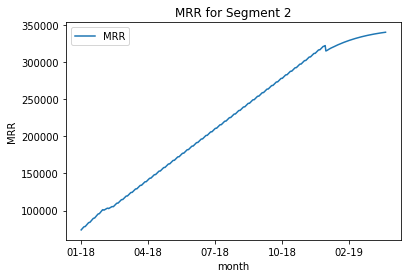

In [15]:
ax = mrr_df.plot(x = 'month', y = 'MRR')
ax.set_ylabel('MRR')
ignore = ax.set_title('MRR for Segment 2')